In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import *

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
df = pd.read_csv('df.csv')

FileNotFoundError: ignored

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df

,일시,교통량,기온(°C),강수량(mm),풍속(m/s),휘발유 가격,소요시간
0,2021-01-01 01:00:00,998,-8.7,0.0,2.4,1499.33,400
1,2021-01-01 02:00:00,793,-9.1,0.0,1.6,1499.33,433
2,2021-01-01 03:00:00,700,-9.3,0.0,1.1,1499.33,433
3,2021-01-01 04:00:00,670,-9.3,0.0,0.3,1499.33,425
4,2021-01-01 05:00:00,746,-9.7,0.0,1.9,1499.33,433
...,...,...,...,...,...,...,...
14609,2022-09-01 19:00:00,6072,27.4,0.0,3.2,1814.83,454
14610,2022-09-01 20:00:00,5571,26.0,0.0,1.5,1814.83,434
14611,2022-09-01 21:00:00,5363,24.7,0.0,0.2,1814.83,452
14612,2022-09-01 22:00:00,2695,23.9,0.0,0.8,1814.83,445


In [ ]:
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

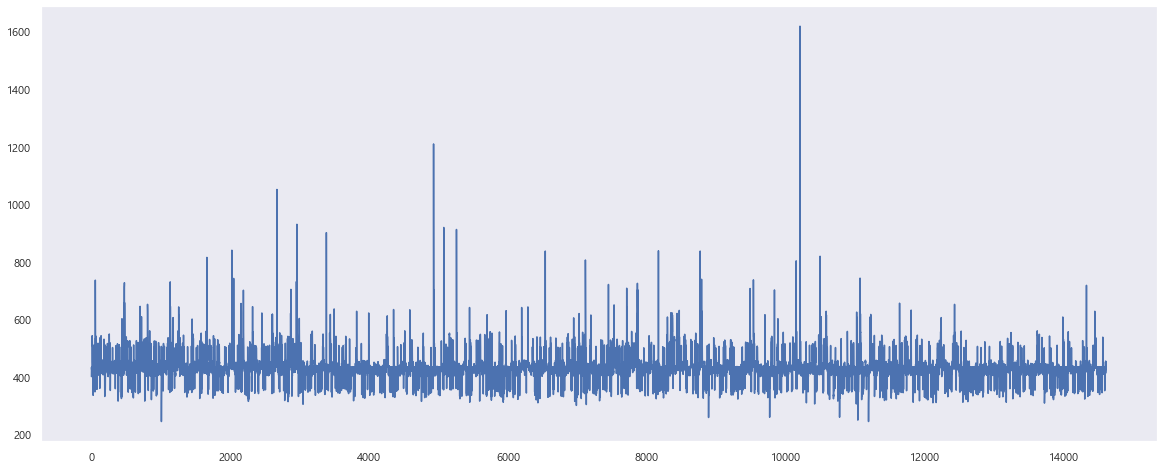

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(df['소요시간'])
plt.grid()
plt.show()

In [ ]:
#2022 9월 9일 12시를 예측하고자한다
#약 일주일 뒤 7*24


In [ ]:
df.tail()

,일시,교통량,기온(°C),강수량(mm),풍속(m/s),휘발유 가격,소요시간
14609,2022-09-01 19:00:00,6072,27.4,0.0,3.2,1814.83,454
14610,2022-09-01 20:00:00,5571,26.0,0.0,1.5,1814.83,434
14611,2022-09-01 21:00:00,5363,24.7,0.0,0.2,1814.83,452
14612,2022-09-01 22:00:00,2695,23.9,0.0,0.8,1814.83,445
14613,2022-09-01 23:00:00,2557,23.1,0.0,0.6,1814.83,413


In [ ]:
df['y'] = df['소요시간'].shift(-(7*24+12))
display(df.head())
display(df.tail())

,일시,교통량,기온(°C),강수량(mm),풍속(m/s),휘발유 가격,소요시간,y
0,2021-01-01 01:00:00,998,-8.7,0.0,2.4,1499.33,400,425.0
1,2021-01-01 02:00:00,793,-9.1,0.0,1.6,1499.33,433,530.0
2,2021-01-01 03:00:00,700,-9.3,0.0,1.1,1499.33,433,431.0
3,2021-01-01 04:00:00,670,-9.3,0.0,0.3,1499.33,425,442.0
4,2021-01-01 05:00:00,746,-9.7,0.0,1.9,1499.33,433,443.0


,일시,교통량,기온(°C),강수량(mm),풍속(m/s),휘발유 가격,소요시간,y
14609,2022-09-01 19:00:00,6072,27.4,0.0,3.2,1814.83,454,NaN
14610,2022-09-01 20:00:00,5571,26.0,0.0,1.5,1814.83,434,NaN
14611,2022-09-01 21:00:00,5363,24.7,0.0,0.2,1814.83,452,NaN
14612,2022-09-01 22:00:00,2695,23.9,0.0,0.8,1814.83,445,NaN
14613,2022-09-01 23:00:00,2557,23.1,0.0,0.6,1814.83,413,NaN


In [ ]:
df.dropna(axis=0, inplace=True)
df.tail()

,일시,교통량,기온(°C),강수량(mm),풍속(m/s),휘발유 가격,소요시간,y
14429,2022-08-25 07:00:00,6892,21.7,0.0,1.4,1811.64,433,454.0
14430,2022-08-25 08:00:00,6410,22.3,0.0,2.2,1811.64,502,434.0
14431,2022-08-25 09:00:00,6040,22.7,0.0,2.4,1811.64,509,452.0
14432,2022-08-25 10:00:00,5386,23.5,0.0,1.0,1811.64,458,445.0
14433,2022-08-25 11:00:00,4933,24.0,0.0,1.6,1811.64,440,413.0


In [ ]:
#분할
target = 'y'
x= df.drop(['일시',target] ,axis=1)
y= df.loc[:,target]

In [ ]:
x.head()

,교통량,기온(°C),강수량(mm),풍속(m/s),휘발유 가격,소요시간
0,998,-8.7,0.0,2.4,1499.33,400
1,793,-9.1,0.0,1.6,1499.33,433
2,700,-9.3,0.0,1.1,1499.33,433
3,670,-9.3,0.0,0.3,1499.33,425
4,746,-9.7,0.0,1.9,1499.33,433


In [ ]:
y.head()

0    425.0
1    530.0
2    431.0
3    442.0
4    443.0
Name: y, dtype: float64

In [ ]:
# 여기서는 1회 분할로 진행합니다.
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 7*24+12, shuffle = False)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import * 

In [ ]:
lr_m = LinearRegression()
lr_m.fit(x_train,y_train)

LinearRegression()

In [ ]:
p1 = lr_m.predict(x_val)

print('RMSE : ', mean_squared_error(y_val, p1, squared = False))
print('MAE  : ', mean_absolute_error(y_val, p1))
print('MAPE : ', mean_absolute_percentage_error(y_val, p1))

RMSE :  35.87534959475909
MAE  :  20.556778379829172
MAPE :  0.04941017918670928


In [ ]:
p1 = pd.Series(p1, index = y_val.index)
p1

14266    429.905716
14267    428.740563
14268    427.396166
14269    426.675829
14270    424.871118
            ...    
14429    429.868343
14430    426.788547
14431    426.396299
14432    430.105737
14433    429.875644
Length: 168, dtype: float64

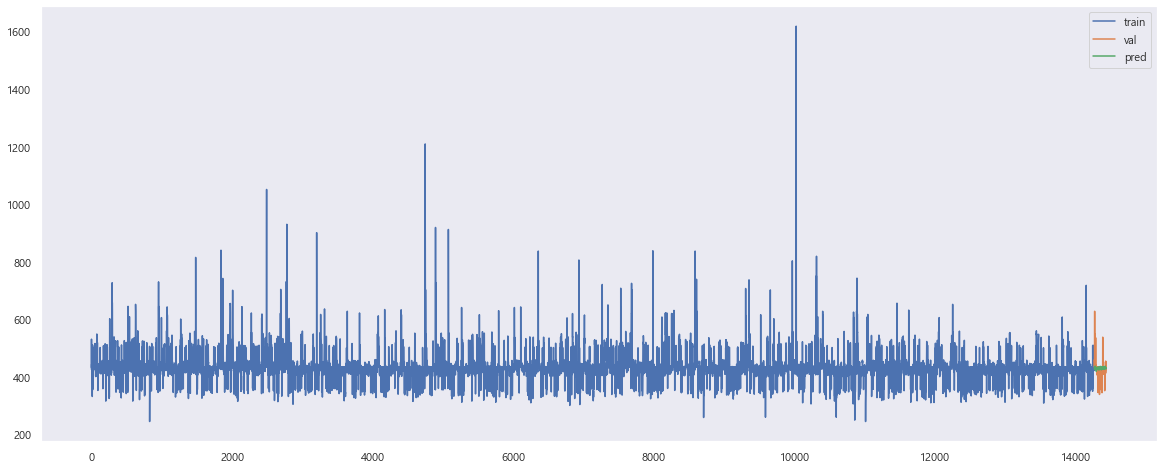

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(y_train, label = 'train')
plt.plot(y_val, label = 'val')
plt.plot(p1, label = 'pred')

plt.legend()
plt.grid()
plt.show()

In [ ]:
#train data에 1600확인
x_train.loc[x_train['소요시간'] >= 1000]

,교통량,기온(°C),강수량(mm),풍속(m/s),휘발유 가격,소요시간
2672,5979,19.0,0.0,3.2,1613.69,1050
4928,4359,30.5,0.0,1.7,1722.05,1208
10206,6405,-1.3,0.0,1.0,1831.46,1617


In [ ]:
소요 시간이 10시간이 넘는 데이터가 있음. 
=> 데이터 전처리시 존재하는 것을 발견 하였으나 이상치를 제거하지는 않음.

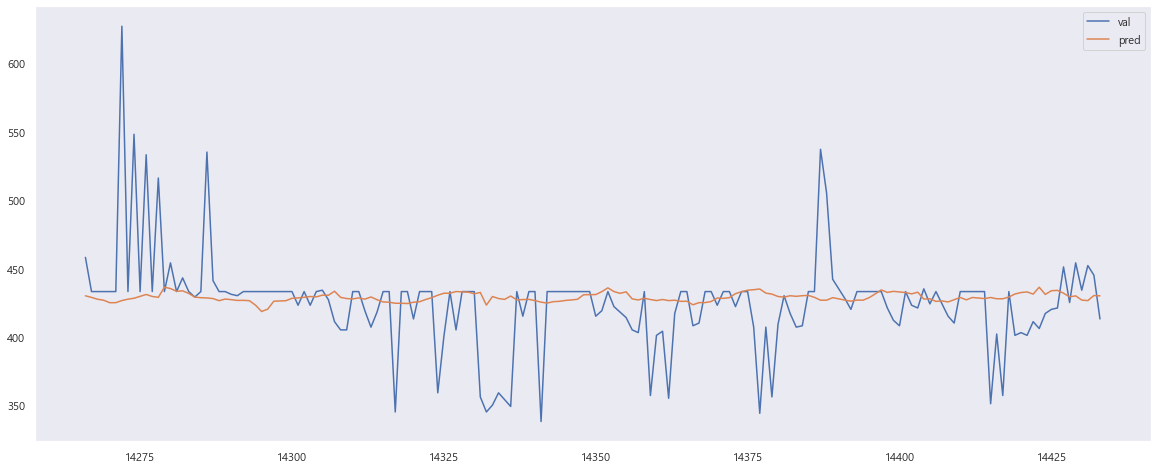

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(y_val, label = 'val')
plt.plot(p1, label = 'pred')

plt.legend()
plt.grid()
plt.show()

In [ ]:
m2 = sm.tsa.SARIMAX(y_train, order=(4,1,4)).fit()

In [ ]:
p2 = m2.forecast(24*7)

print('RMSE : ', mean_squared_error(y_val, p2, squared = False))
print('MAE  : ', mean_absolute_error(y_val, p2))
print('MAPE : ', mean_absolute_percentage_error(y_val, p2))

RMSE :  35.159828136657715
MAE  :  20.316106855969576
MAPE :  0.048436468281595785


In [ ]:
p2 = pd.Series(p2, index = y_val.index)

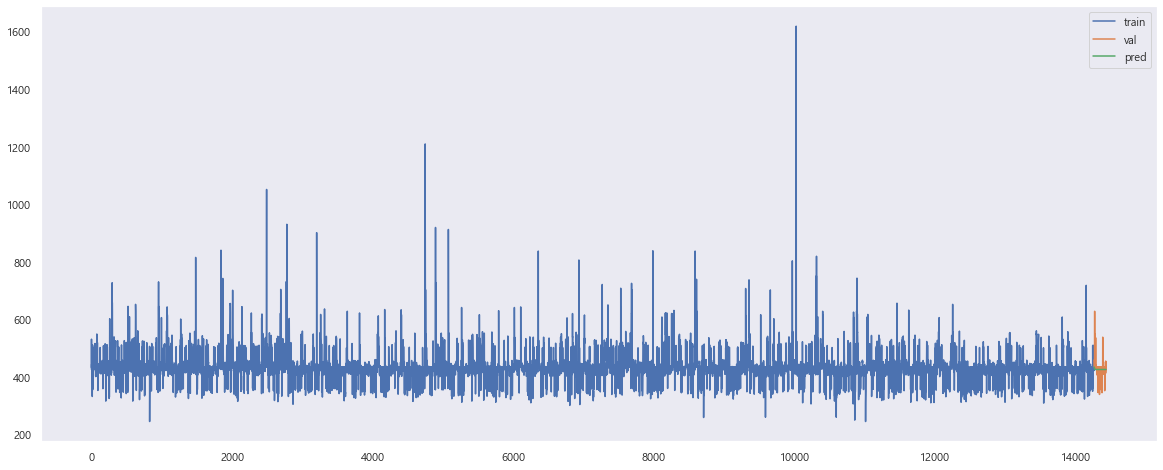

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(y_train, label = 'train')
plt.plot(y_val, label = 'val')
plt.plot(p2, label = 'pred')

plt.legend()
plt.grid()
plt.show()

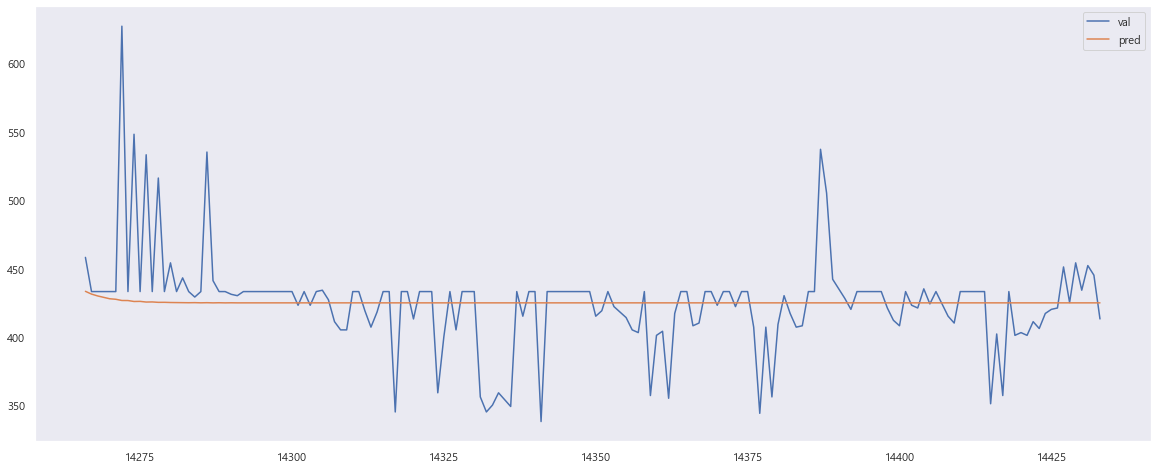

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(y_val, label = 'val')
plt.plot(p2, label = 'pred')

plt.legend()
plt.grid()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df.shape

(14434, 8)

In [ ]:
from itertools import product

In [ ]:
p = [1,2,3,4]
q = [1,2,3,4]
d = [1]
iter = list(product(p,d,q))

In [ ]:
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(24*7+12)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)


In [ ]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

,"params(p,d,q)",mae,aic
0,"(1, 1, 1)",19.446419,146374.349285


,"params(p,d,q)",mae,aic
3,"(1, 1, 4)",19.934815,145813.309033


In [ ]:
m1_3 = sm.tsa.SARIMAX(y_train, order=(1,1,4)).fit()

In [ ]:
def residual_diag(residuals, lags = 30) :
    print('* 정규성 검정(> 0.05) : ', round(spst.shapiro(residuals)[1],5))
    print('* 정상성 검정(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],5))
    print('* 자기상관성 확인(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

In [ ]:
def plot_model_result(y_train, y_val, pred) :
    pred = pd.Series(pred, index = y_val.index)

    # 전체 시각화
    plt.figure(figsize = (20,12))
    plt.subplot(2,1,1)
    plt.plot(y_train, label = 'train')
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.subplot(2,1,2)
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.show()

* 정규성 검정(> 0.05) :  0.0
* 정상성 검정(< 0.05) :  0.0
* 자기상관성 확인(ACF, PACF)


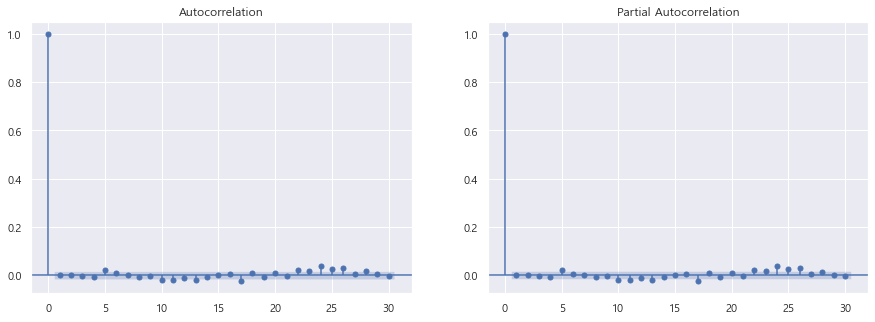

In [ ]:
residuals = m1_3.resid
residual_diag(residuals)

In [ ]:
pred = m1_3.forecast(24*7+12)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 19.934815237705042
MAPE: 0.04743432661807967


In [ ]:
m2_1 = sm.tsa.SARIMAX(y_train, order=(1,1,4), seasonal_order=(1,1,1,7)).fit()

* 정규성 검정(> 0.05) :  0.0
* 정상성 검정(< 0.05) :  0.0
* 자기상관성 확인(ACF, PACF)


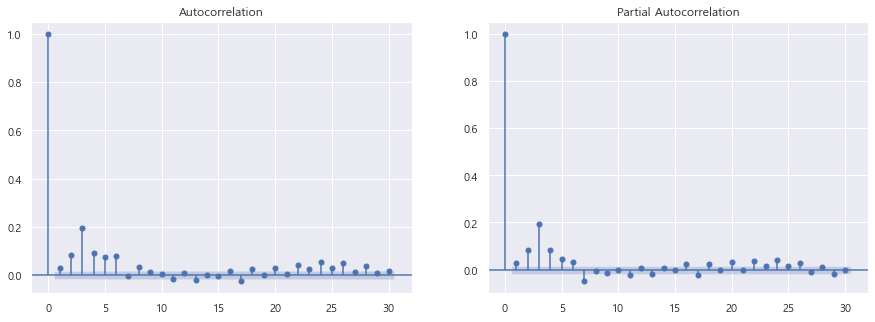

In [ ]:
residuals = m2_1.resid
residual_diag(residuals)

In [ ]:
print('model2_0 AIC :', m2_1.aic)

model2_0 AIC : 146693.27652439894


In [ ]:
pred = m2_1.forecast(24*7+12)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 19.820441767089896
MAPE: 0.047219626500287305


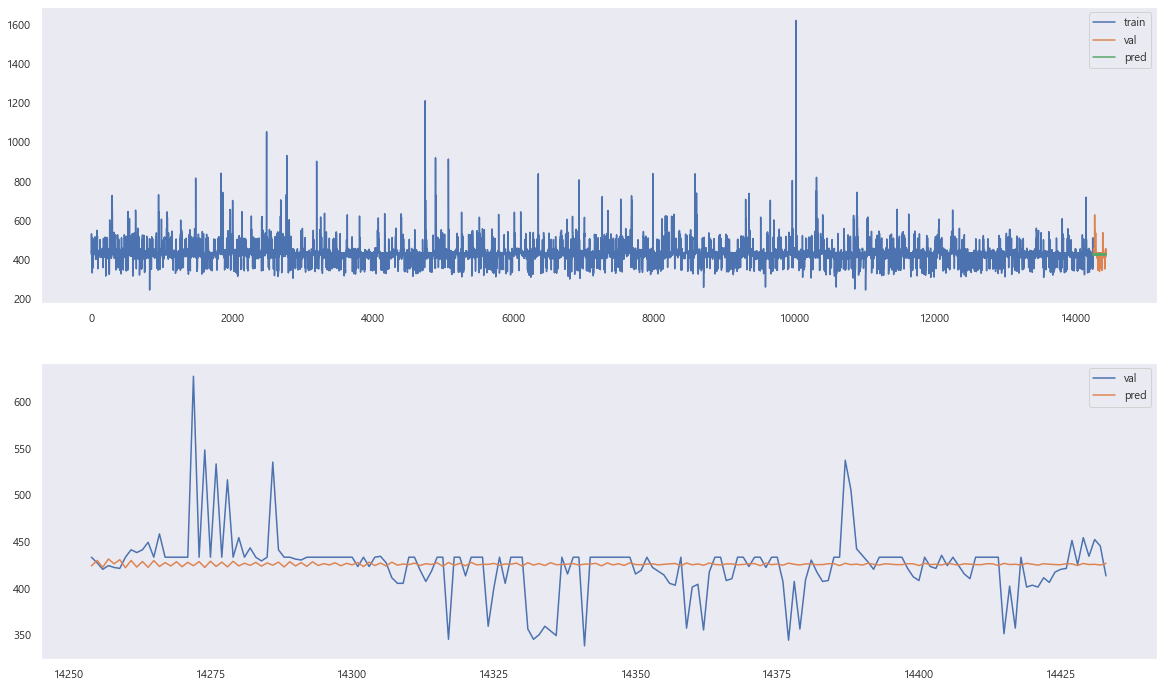

In [ ]:
plot_model_result(y_train, y_val, pred)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
val_size = 24*7+12
nfold = 3

tscv = TimeSeriesSplit(n_splits = nfold, test_size = val_size)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=180)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import * 

In [ ]:
rmse, mae, mape = [],[],[]
residuals = []
pred = []
model = LinearRegression()

for train_index, val_index in tscv.split(x):

    # 인덱스로 데이터 분할
    x_train, y_train = x.iloc[train_index], y.iloc[train_index]
    x_val, y_val = x.iloc[val_index], y.iloc[val_index]

    # 학습
    model.fit(x_train, y_train)

    # 예측
    pr = model.predict(x_val)
    pred += list(pr)

    # 평가
    rmse.append(mean_squared_error(y_val, pr, squared = False))
    mae.append(mean_absolute_error(y_val, pr))
    mape.append(mean_absolute_percentage_error(y_val, pr))

    # 잔차 : 각 fold의 결과를 리스트로 변환하여 추가
    residuals += list(y_val - pr)

np.mean(rmse), np.mean(mae), np.mean(mape)

(33.41332569452436, 18.947555748451133, 0.04602178395530429)

In [ ]:
n = val_size * nfold

In [ ]:
y[-n:]

13894    443.0
13895    443.0
13896    422.0
13897    430.0
13898    459.0
         ...  
14429    454.0
14430    434.0
14431    452.0
14432    445.0
14433    413.0
Name: y, Length: 540, dtype: float64

In [ ]:
pred = pd.Series(pred, index = y[-n:])
pred

13894    428.300508
13895    429.101408
13896    426.838222
13897    427.679071
13898    427.679097
            ...    
14429    429.852203
14430    426.778451
14431    426.388762
14432    430.096453
14433    429.870008
Length: 540, dtype: float64

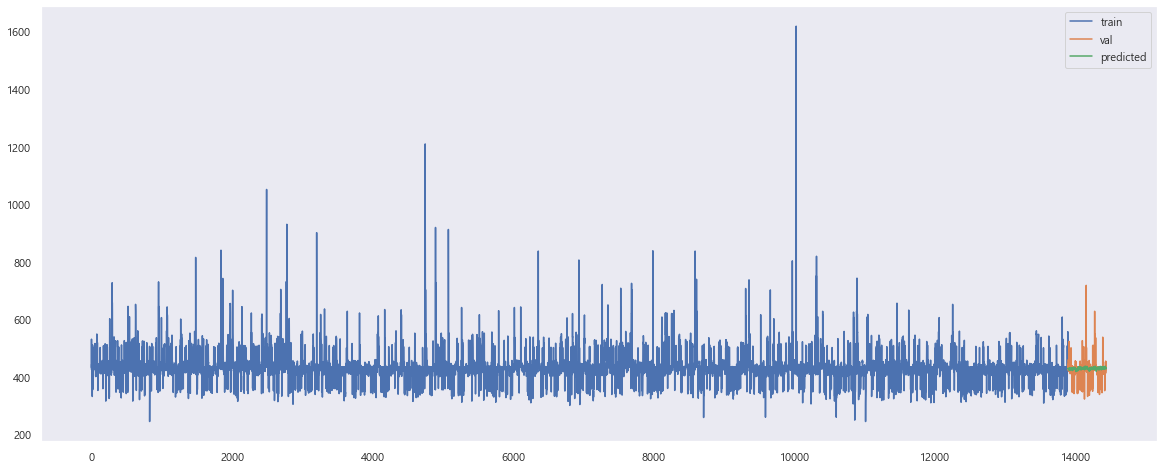

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(y[:-n], label = 'train')
plt.plot(y[-n:], label = 'val')
plt.plot(pred, label = 'predicted')

plt.legend()
plt.grid()
plt.show()